In [1]:
# Importation de librairies

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler,  OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

### Source du dataset 

- UCI Machine Learning : "https://archive.ics.uci.edu/dataset/502/online+retail+ii"
- Kaggle : "https://www.kaggle.com/code/aslibaraf/customer-behavior-analysis/"

In [2]:
current_directory = os.getcwd()
lien_dataset = os.path.join(current_directory, 'Online Retail.csv')

In [3]:
df = pd.read_csv(lien_dataset)

## Partie 1 : Nettoyage des donnees et Analyse Exploratoire

In [4]:
df.head(6)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [7]:
df.groupby(['Country'])["CustomerID"].nunique()

Country
Australia                  9
Austria                   11
Bahrain                    3
Belgium                   25
Brazil                     1
Canada                     4
Channel Islands            9
Cyprus                     8
Czech Republic             1
Denmark                    9
EIRE                       4
European Community         1
Finland                   12
France                    88
Germany                   95
Greece                     4
Hong Kong                  1
Iceland                    1
Israel                     5
Italy                     15
Japan                      8
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands                9
Norway                    10
Poland                     6
Portugal                  20
RSA                        1
Saudi Arabia               1
Singapore                  1
Spain                     31
Sweden                     8
Switzerland               22
USA   

In [8]:
clients_total = df["CustomerID"].nunique()
df["Valeur_panier"] = df["Quantity"]*df["UnitPrice"]
chiffre_affaire = df["Valeur_panier"].sum()

print(f"L\'entreprise a {round(chiffre_affaire,2)} USD de chiffre d'affaire avec {clients_total} clients total")

L'entreprise a 9747747.93 USD de chiffre d'affaire avec 4372 clients total


In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
Valeur_panier       0
dtype: int64

In [10]:
df["Description"].mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object

In [11]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceDate"].dtypes

dtype('<M8[ns]')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      541909 non-null  object        
 1   StockCode      541909 non-null  object        
 2   Description    540455 non-null  object        
 3   Quantity       541909 non-null  int64         
 4   InvoiceDate    541909 non-null  datetime64[ns]
 5   UnitPrice      541909 non-null  float64       
 6   CustomerID     541909 non-null  int64         
 7   Country        541909 non-null  object        
 8   Valeur_panier  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 37.2+ MB


In [13]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
Valeur_panier       0
dtype: int64

In [14]:
# suppression des variables inutiles

df = df.drop(["InvoiceNo","StockCode","Quantity","UnitPrice"], axis = 1)
df.head()

,Description,InvoiceDate,CustomerID,Country,Valeur_panier
0,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,17850,United Kingdom,15.30
1,WHITE METAL LANTERN,2010-12-01 08:26:00,17850,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,17850,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,17850,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,17850,United Kingdom,20.34


In [15]:
display(df[df["Valeur_panier"]<0])
len(df[df["Valeur_panier"]<0])

# Il existe des prix négatifs qui seront supprimer plus tard

,Description,InvoiceDate,CustomerID,Country,Valeur_panier
141,Discount,2010-12-01 09:41:00,14527,United Kingdom,-27.50
154,SET OF 3 COLOURED FLYING DUCKS,2010-12-01 09:49:00,15311,United Kingdom,-4.65
235,PLASTERS IN TIN CIRCUS PARADE,2010-12-01 10:24:00,17548,United Kingdom,-19.80
236,PACK OF 12 PINK PAISLEY TISSUES,2010-12-01 10:24:00,17548,United Kingdom,-6.96
237,PACK OF 12 BLUE PAISLEY TISSUES,2010-12-01 10:24:00,17548,United Kingdom,-6.96
...,...,...,...,...,...
540449,ZINC T-LIGHT HOLDER STARS SMALL,2011-12-09 09:57:00,14397,United Kingdom,-9.13
541541,Manual,2011-12-09 10:28:00,15498,United Kingdom,-224.69
541715,VICTORIAN SEWING BOX LARGE,2011-12-09 11:57:00,15311,United Kingdom,-54.75
541716,HANGING HEART JAR T-LIGHT HOLDER,2011-12-09 11:58:00,17315,United Kingdom,-1.25


9290

In [16]:
df_panier = df.groupby(["CustomerID","InvoiceDate"], as_index = False)["Valeur_panier"].sum()
df_panier.head()

,CustomerID,InvoiceDate,Valeur_panier
0,12346,2011-01-18 10:01:00,77183.60
1,12346,2011-01-18 10:17:00,-77183.60
2,12347,2010-12-07 14:57:00,711.79
3,12347,2011-01-26 14:30:00,475.39
4,12347,2011-04-07 10:43:00,636.25


In [17]:
df_client = df_panier.groupby(["CustomerID"], as_index = False)["Valeur_panier"].sum()
panier_moyen = df_panier.groupby(["CustomerID"], as_index = False)["Valeur_panier"].mean()

df_client["Panier_moyen"] = panier_moyen.iloc[:,1]
df_client

,CustomerID,Valeur_panier,Panier_moyen
0,12346,0.00,0.000000
1,12347,4310.00,615.714286
2,12348,1797.24,449.310000
3,12349,1757.55,1757.550000
4,12350,334.40,334.400000
...,...,...,...
4367,18280,180.60,180.600000
4368,18281,80.82,80.820000
4369,18282,176.60,58.866667
4370,18283,2094.88,130.930000


In [18]:
col = {"Valeur_panier":"Panier_total"}
df_client.rename(columns = col, inplace = True)

df_client.head()

,CustomerID,Panier_total,Panier_moyen
0,12346,0.00,0.000000
1,12347,4310.00,615.714286
2,12348,1797.24,449.310000
3,12349,1757.55,1757.550000
4,12350,334.40,334.400000


In [19]:
df_client_cleaned = df_client[df_client["Panier_moyen"] > 0]
len(df_client_cleaned)
df_client_cleaned.duplicated().sum()

0

In [20]:
lien_dataset = os.path.join(current_directory, 'df_client_cleaned.csv')

df_client_cleaned.to_csv(lien_dataset, index = False)

## Partie 2 : FEATURES ENGINEERING

In [21]:
#######################         FEATURES ENGINEERING          #######################
###        CREATION DE NOUVELLE VARIABLES UTILIES POUR LA SEGMENTATION            ###
###                                  RFM ANALYSIS                                 ###
###  Recence: Le nombre de nombre de jour écoulés depuis le dernier achat         ###
###  Monetaire(valeur) : Le montant total dépensé par le client                   ### 
###  Frequence: Le nombre de fois que le client à éffectué un achat               ### 
###                                                                               ### 
###            On ajoute uniquement de variable interpretable comme KPI           ### 
#####################################################################################

In [22]:
# Scoring Recense
# On considère la dernière date d'achat comme date l'actuel .reset_index()

date_actuelle = df_panier["InvoiceDate"].max()
df_panier["Dernier_achat"] = (date_actuelle - df_panier["InvoiceDate"]).dt.days
df_dernier_achat = df_panier.groupby(["CustomerID"])["Dernier_achat"].min().reset_index()
df_dernier_achat.columns = ["CustomerID","Recence"]
df_dernier_achat["Score_recence"] = np.log1p(df_dernier_achat["Recence"])
df_dernier_achat.head()

,CustomerID,Recence,Score_recence
0,12346,325,5.786897
1,12347,1,0.693147
2,12348,74,4.317488
3,12349,18,2.944439
4,12350,309,5.736572


In [23]:
# Scoring Retention

df_premier_achat = df_panier.groupby(["CustomerID"])["Dernier_achat"].max().reset_index()
df_premier_achat.columns = ["CustomerID","Retention"]
df_premier_achat['Score_retention'] = np.log1p(df_premier_achat['Retention'])
df_premier_achat

df_dernier_achat = df_dernier_achat.merge(df_premier_achat, on = "CustomerID")
df_dernier_achat.head()

,CustomerID,Recence,Score_recence,Retention,Score_retention
0,12346,325,5.786897,325,5.786897
1,12347,1,0.693147,366,5.905362
2,12348,74,4.317488,357,5.880533
3,12349,18,2.944439,18,2.944439
4,12350,309,5.736572,309,5.736572


In [24]:
# Scoring Frequence

nombre_commande = df_panier.groupby(["CustomerID"])["InvoiceDate"].nunique().reset_index()
nombre_commande.columns = ["CustomerID","Frequence"]
nombre_commande["Score_frequence"] = np.log1p(nombre_commande["Frequence"])
nombre_commande

df_dernier_achat = df_dernier_achat.merge(nombre_commande, on = "CustomerID")
df_dernier_achat.head()

,CustomerID,Recence,Score_recence,Retention,Score_retention,Frequence,Score_frequence
0,12346,325,5.786897,325,5.786897,2,1.098612
1,12347,1,0.693147,366,5.905362,7,2.079442
2,12348,74,4.317488,357,5.880533,4,1.609438
3,12349,18,2.944439,18,2.944439,1,0.693147
4,12350,309,5.736572,309,5.736572,1,0.693147


In [25]:
# Scoring Montant

panier_total = df_panier.groupby(["CustomerID"])["Valeur_panier"].sum().reset_index()
panier_total.columns = ["CustomerID","Depense"]
panier_total["Score_depense"] = np.log1p(panier_total["Depense"])
panier_total

df_dernier_achat = df_dernier_achat.merge(panier_total, on = "CustomerID")
df_dernier_achat.head()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,CustomerID,Recence,Score_recence,Retention,Score_retention,Frequence,Score_frequence,Depense,Score_depense
0,12346,325,5.786897,325,5.786897,2,1.098612,0.00,0.000000
1,12347,1,0.693147,366,5.905362,7,2.079442,4310.00,8.368925
2,12348,74,4.317488,357,5.880533,4,1.609438,1797.24,7.494564
3,12349,18,2.944439,18,2.944439,1,0.693147,1757.55,7.472245
4,12350,309,5.736572,309,5.736572,1,0.693147,334.40,5.815324


In [26]:
# Customer Lifetime Value CLV : Valeur Vie Client

RFM = df_dernier_achat.copy()

RFM["CLV"] = RFM["Depense"]*(RFM["Retention"]/365)
RFM["Score_RFM"] = RFM['Recence']*RFM['Frequence']*RFM['Depense']
RFM.head()

,CustomerID,Recence,Score_recence,Retention,Score_retention,Frequence,Score_frequence,Depense,Score_depense,CLV,Score_RFM
0,12346,325,5.786897,325,5.786897,2,1.098612,0.00,0.000000,0.000000,0.00
1,12347,1,0.693147,366,5.905362,7,2.079442,4310.00,8.368925,4321.808219,30170.00
2,12348,74,4.317488,357,5.880533,4,1.609438,1797.24,7.494564,1757.848438,531983.04
3,12349,18,2.944439,18,2.944439,1,0.693147,1757.55,7.472245,86.673699,31635.90
4,12350,309,5.736572,309,5.736572,1,0.693147,334.40,5.815324,283.094795,103329.60


In [27]:
# Identification des clients VIP

seuil_frequence = RFM["Frequence"].quantile(0.75)
seuil_monetaire = RFM["Depense"].quantile(0.75)

RFM["Clients_haute_valeur"] = (RFM["Frequence"]> seuil_frequence) & (RFM["Depense"]> seuil_frequence)
RFM.head()

,CustomerID,Recence,Score_recence,Retention,Score_retention,Frequence,Score_frequence,Depense,Score_depense,CLV,Score_RFM,Clients_haute_valeur
0,12346,325,5.786897,325,5.786897,2,1.098612,0.00,0.000000,0.000000,0.00,False
1,12347,1,0.693147,366,5.905362,7,2.079442,4310.00,8.368925,4321.808219,30170.00,True
2,12348,74,4.317488,357,5.880533,4,1.609438,1797.24,7.494564,1757.848438,531983.04,False
3,12349,18,2.944439,18,2.944439,1,0.693147,1757.55,7.472245,86.673699,31635.90,False
4,12350,309,5.736572,309,5.736572,1,0.693147,334.40,5.815324,283.094795,103329.60,False


In [28]:
nombre_clients_VIP = RFM["Clients_haute_valeur"].sum()

print(f"""L\'entreprise a {nombre_clients_VIP} clients qui peuvent etre considérer comme VIP, 
      ils ont dépensé plus de {seuil_monetaire} USD sur toute la période.""")

L'entreprise a 1081 clients qui peuvent etre considérer comme VIP, 
      ils ont dépensé plus de 1612.295 USD sur toute la période.


In [29]:
RFM.isna().sum()
RFM = RFM.dropna()
RFM.isna().sum()
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4331 entries, 0 to 4371
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            4331 non-null   int64  
 1   Recence               4331 non-null   int64  
 2   Score_recence         4331 non-null   float64
 3   Retention             4331 non-null   int64  
 4   Score_retention       4331 non-null   float64
 5   Frequence             4331 non-null   int64  
 6   Score_frequence       4331 non-null   float64
 7   Depense               4331 non-null   float64
 8   Score_depense         4331 non-null   float64
 9   CLV                   4331 non-null   float64
 10  Score_RFM             4331 non-null   float64
 11  Clients_haute_valeur  4331 non-null   bool   
dtypes: bool(1), float64(7), int64(4)
memory usage: 410.3 KB


### Régression polynomiale et recherche d'un intervalle de prédiction

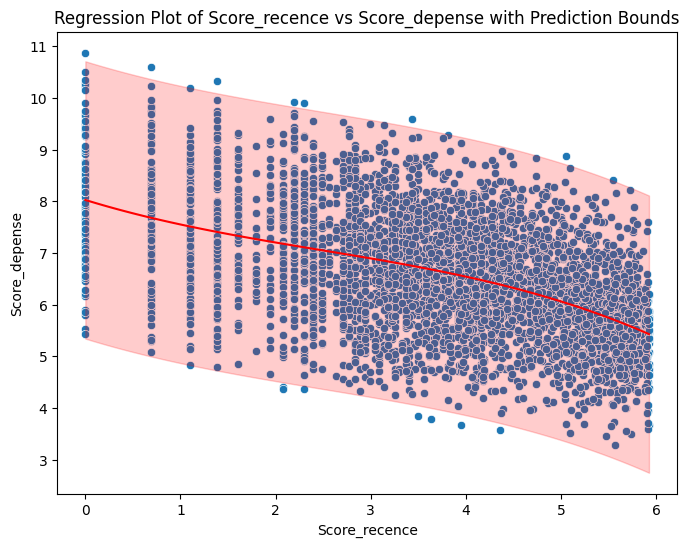

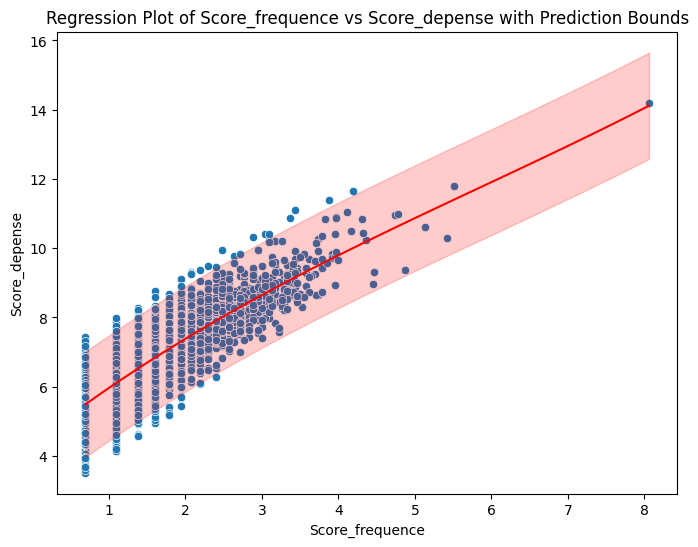

In [30]:
def intervalle_prediction(x, y, percentile = 0.99) :
    model = np.poly1d(np.polyfit(x,y,3))
    x_minmax = np.linspace(x.min(), x.max(), 100)
    y_pred = model(x_minmax)
    se = np.sqrt((np.sum((y - model(x))**2)) / (len(y) - 2))
    t_value = np.abs(np.percentile(np.random.standard_t(df=len(x)-2, size=1000), 100 * (1 - (1 - percentile) / 2)))
    bound = t_value * se * np.sqrt(1 + 1/len(y) + (x_minmax - np.mean(x))**2 / np.sum((x - np.mean(x))**2))

    return model, x_minmax, y_pred, bound
    
# Function to remove outliers based on prediction bounds
def supprimer_outlier(ddf, x_col, y_col):
    x = ddf[x_col]
    y = ddf[y_col]
    model, x_minmax, y_pred, bound = intervalle_prediction(x, y)
    predictions = model(x)
    se = np.sqrt((np.sum((y - model(x))**2)) / (len(y) - 2))
    t_value = np.abs(np.percentile(np.random.standard_t(df=len(x)-2, size=1000), 100 * (1 - (1 - 0.99) / 2)))
    bound = t_value * se * np.sqrt(1 + 1/len(y) + (x - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    
    lower_bound = predictions - bound
    upper_bound = predictions + bound
    
    inliers = (y >= lower_bound) & (y <= upper_bound)
    return ddf[inliers]

colonnes_requis = ['Score_recence', 'Score_depense', 'Score_frequence']
data = RFM[colonnes_requis]

pairs = [('Score_recence', 'Score_depense'), ('Score_frequence','Score_depense')]
cleaned_data = {}

for x_col, y_col in pairs:
    cleaned_data[(x_col, y_col)] = supprimer_outlier(data, x_col, y_col)

# Generate the regression plots for each pair
for x_col, y_col in pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_col, y=y_col, data=cleaned_data[(x_col, y_col)])
    model, x_minmax, y_pred, bound = intervalle_prediction(cleaned_data[(x_col, y_col)][x_col], cleaned_data[(x_col, y_col)][y_col])
    plt.plot(x_minmax, y_pred, color='red')
    plt.fill_between(x_minmax, y_pred - bound, y_pred + bound, color='red', alpha=0.2)
    plt.xlabel(x_col) 
    plt.ylabel(y_col) 
    plt.title(f'Regression Plot of {x_col} vs {y_col} with Prediction Bounds')
    plt.show(block = False)
    plt.pause(2)

In [31]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4331 entries, 0 to 4371
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            4331 non-null   int64  
 1   Recence               4331 non-null   int64  
 2   Score_recence         4331 non-null   float64
 3   Retention             4331 non-null   int64  
 4   Score_retention       4331 non-null   float64
 5   Frequence             4331 non-null   int64  
 6   Score_frequence       4331 non-null   float64
 7   Depense               4331 non-null   float64
 8   Score_depense         4331 non-null   float64
 9   CLV                   4331 non-null   float64
 10  Score_RFM             4331 non-null   float64
 11  Clients_haute_valeur  4331 non-null   bool   
dtypes: bool(1), float64(7), int64(4)
memory usage: 410.3 KB


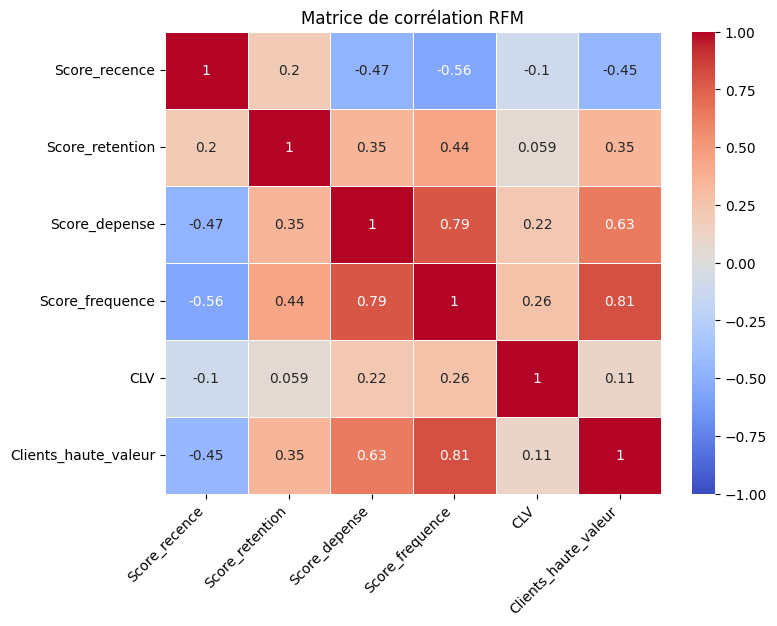

In [32]:
matrice = RFM[["Score_recence","Score_retention","Score_depense","Score_frequence","CLV","Clients_haute_valeur"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(matrice, annot = True, cmap = 'coolwarm', linewidths = 0.5, vmin = -1, vmax=1)
plt.title("Matrice de corrélation RFM")
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
lien_RFM = os.path.join(current_directory, "CustomerRFM.csv")
RFM.to_csv(lien_RFM, index = False )

## Partie 3 : ANALYSE EN COMPOSANTE PRINCIPALE (ACP)

In [34]:
##################    ANALYSE EN COMPOSANTE PRINCIPALE (ACP)       ##################
###                                                                               ###
###   L'ACP aide  réduire la dimension et regrouper les clients selons leurs      ###
###   Caractaristiques communes                                                   ### 
#####################################################################################

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
import gc
gc.collect()
print("Mémoire vidé")

Mémoire vidé


In [37]:
# ACP avec base centré réduite
df_pca = RFM[["Score_recence","Score_retention","Score_depense","Score_frequence","Clients_haute_valeur"]]
scaler = StandardScaler()
df_centre_reduit = scaler.fit_transform(df_pca)

# Modele ACP
pca = PCA()
pca.fit_transform(df_centre_reduit)
variance_expliquee = pca.explained_variance_ratio_
valeur_propre = pca.explained_variance_

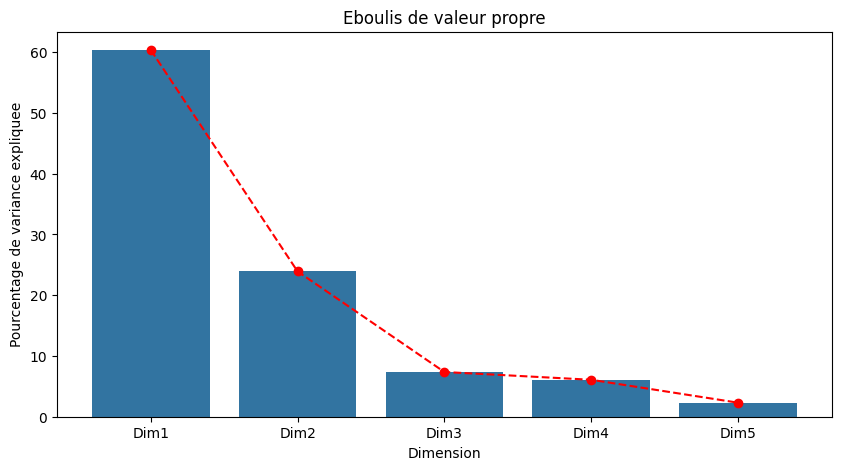

In [38]:
# Analyse des valeurs propre  : Variance expliquée
plt.figure(figsize=(10,5))
table_pca = pd.DataFrame({
    "Dimension" : ["Dim"+str(i +1) for i in range(pca.n_components_)],
    "Valeur_propre" : pca.explained_variance_,
    "%_Variance_expliquee" : np.round(variance_expliquee*100, 2),
     "%_Cumul_variance_expliquee" : np.round(np.cumsum(variance_expliquee*100),2)
     })

sns.barplot(x = "Dimension", y="%_Variance_expliquee", data = table_pca)
plt.plot(table_pca["Dimension"],table_pca["%_Variance_expliquee"],marker='o', linestyle='--', color = "red")
plt.title("Eboulis de valeur propre")
plt.ylabel("Pourcentage de variance expliquee")
plt.xlabel("Dimension")
plt.show()

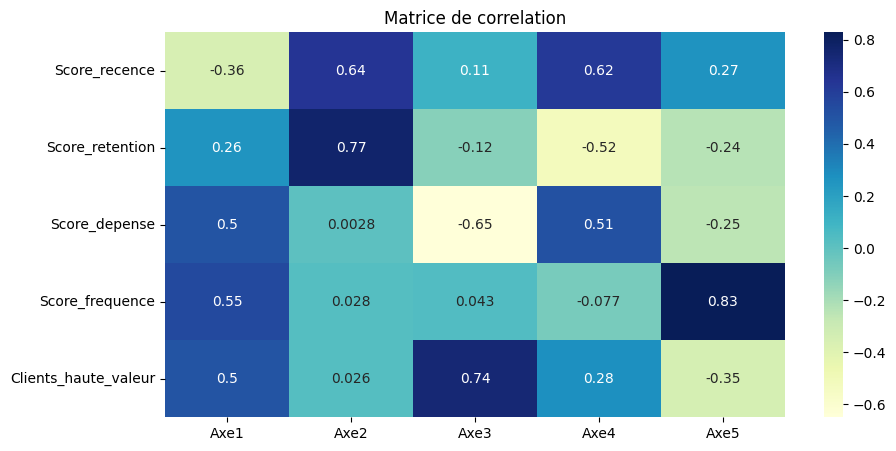

In [39]:
# Qualite de representation des variables

cos = pca.components_.T #loading ou correlation entre les variables et les 
colonne = ["Axe" + str(i+1) for i in range(pca.n_components_)]
loadings = pd.DataFrame(cos, columns = colonne, index = df_pca.columns)
loadings

plt.figure(figsize=(10,5))
sns.heatmap(loadings, annot = True, cmap ="YlGnBu")
plt.title("Matrice de correlation")
plt.show()

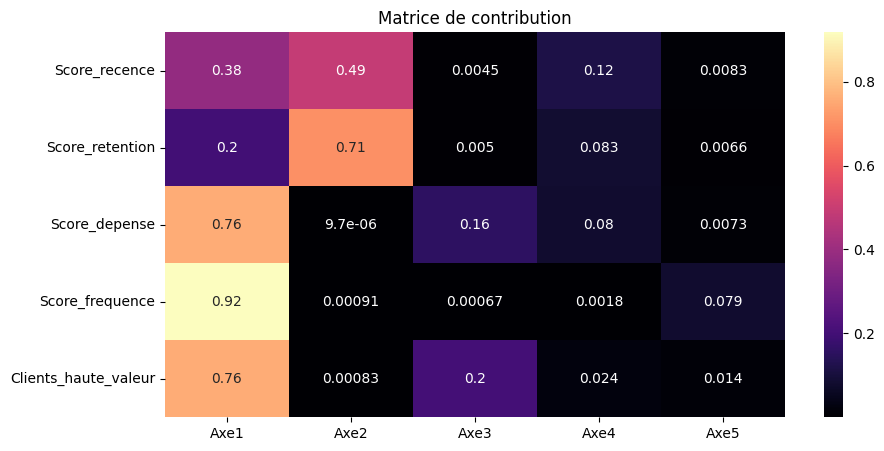

In [40]:
contribution_variable = (cos**2)*valeur_propre  #la contribution des variables à la formation des axes
table_contribution = pd.DataFrame(contribution_variable, columns= colonne, index = df_pca.columns )
table_contribution
# Axe 1 est formé essentiellement par les clients les plus fréquents, 
# qui dépensent assez (Score_depense +++ Score_frequence +++ Client_haute_valeur ++++)
# axe 2 est formé par les clients anciens et qui ont achété récemment (Score_recence ++ Score_retention +++ )

# Matrice de contribution des variables à la formation des axes
plt.figure(figsize=(10,5))
sns.heatmap(table_contribution, annot = True,cmap='magma')
plt.title("Matrice de contribution")
plt.show()

## Partie 4 : Clustering 

In [41]:
##################               CLUSTERING AVEC K-MEANS           ##################
###                                                                               ###
###   Les clients seront regroupeés dans des clusters ou grouypes selons leur     ###
###   Caractaristiques communes, chaque cluster represent un ensemble de clients  ### 
###   ayants des comportement plus ou moins semblables.                           ### 
#####################################################################################

In [42]:
import warnings
from yellowbrick.cluster import KElbowVisualizer

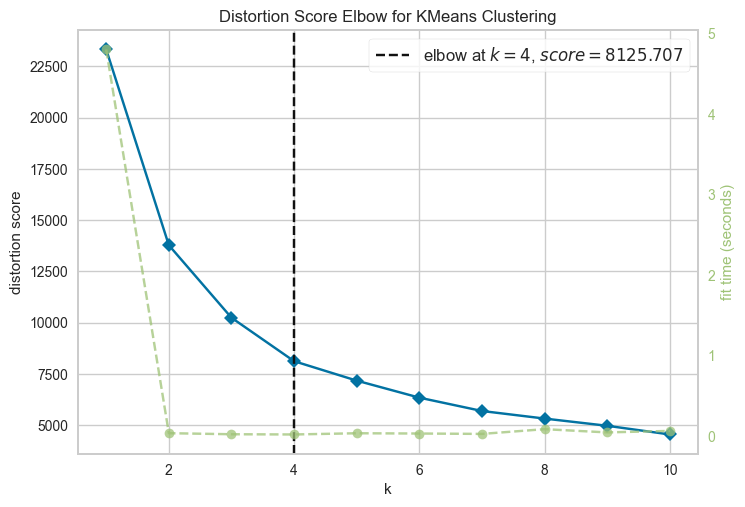

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
warnings.simplefilter("ignore")

df_kmeans = RFM[["Score_recence","Score_retention","Score_depense","Score_frequence","Clients_haute_valeur"]].copy()
kmeans = KMeans()
graph = KElbowVisualizer(kmeans, k=(1,11))
graph.fit(df_kmeans)
graph.show()

## Partie 5 : ACP & Kmeans combiné

- On retiens 3 facteur pour le modele ACP
- 4 Clusters pour le Clustering

In [44]:
df_pca = RFM[["Score_recence","Score_retention","Score_depense","Score_frequence","Clients_haute_valeur"]]
scaler = StandardScaler()
df_centre_reduit = scaler.fit_transform(df_pca)

# Modele ACP
pca = PCA(n_components = 3)
df_facteurs = pca.fit_transform(df_centre_reduit)
variance_expliquee = pca.explained_variance_ratio_
valeur_propre = pca.explained_variance_

valeur_propre = pca.explained_variance_
cos = pca.components_.T
contrib = (cos**2)*valeur_propre
contrib_pourcentage = contrib * 100
colonne = ["Axe"+str(x+1) for x in range(pca.n_components_)]
tableau_contrib = pd.DataFrame(contrib_pourcentage, columns = colonne, index= df_pca.columns)


# Clustering
kmeans = KMeans(n_clusters= 4, random_state=19)
kmeans.fit(df_facteurs)
df_kmeans["Cluster"] = kmeans.labels_
df_kmeans.head(15)


silhouette = silhouette_score(df_facteurs, df_kmeans['Cluster'] )
db_indice = davies_bouldin_score(df_facteurs, df_kmeans['Cluster'])
ch_indice = calinski_harabasz_score(df_facteurs, df_kmeans['Cluster'])
print(f"silhouette_score : {silhouette:.3f} ")
print(f"davies_bouldin_score : {db_indice:.3f} ")
print(f"calinski_harabasz_score : {ch_indice:.3f} ")

centroids = pd.DataFrame(df_kmeans.groupby(["Cluster"])[["Score_recence","Score_retention","Score_depense","Score_frequence","Clients_haute_valeur"]].mean())

display(tableau_contrib)
display(df_kmeans)
display(centroids)

silhouette_score : 0.434 
davies_bouldin_score : 0.788 
calinski_harabasz_score : 4697.114 


,Axe1,Axe2,Axe3
Score_recence,38.326939,48.843836,0.451669
Score_retention,20.042699,70.524941,0.501966
Score_depense,75.723624,0.000965,15.576184
Score_frequence,91.755469,0.090769,0.066888
Clients_haute_valeur,75.941829,0.083226,20.233186


,Score_recence,Score_retention,Score_depense,Score_frequence,Clients_haute_valeur,Cluster
0,5.786897,5.786897,0.000000,1.098612,False,2
1,0.693147,5.905362,8.368925,2.079442,True,1
2,4.317488,5.880533,7.494564,1.609438,False,3
3,2.944439,2.944439,7.472245,0.693147,False,0
4,5.736572,5.736572,5.815324,0.693147,False,2
...,...,...,...,...,...,...
4367,5.627621,5.627621,5.201806,0.693147,False,2
4368,5.198497,5.198497,4.404522,0.693147,False,2
4369,2.079442,4.836282,5.179534,1.386294,False,0
4370,1.386294,5.820083,7.647729,2.833213,True,1


,Score_recence,Score_retention,Score_depense,Score_frequence,Clients_haute_valeur
Cluster,,,,,
0,3.165952,3.622351,5.687655,0.886911,0.000000
1,2.577652,5.695256,7.990827,2.485745,1.000000
2,5.257898,5.469920,5.562671,0.910740,0.001585
3,3.492908,5.400804,6.922922,1.471696,0.000000


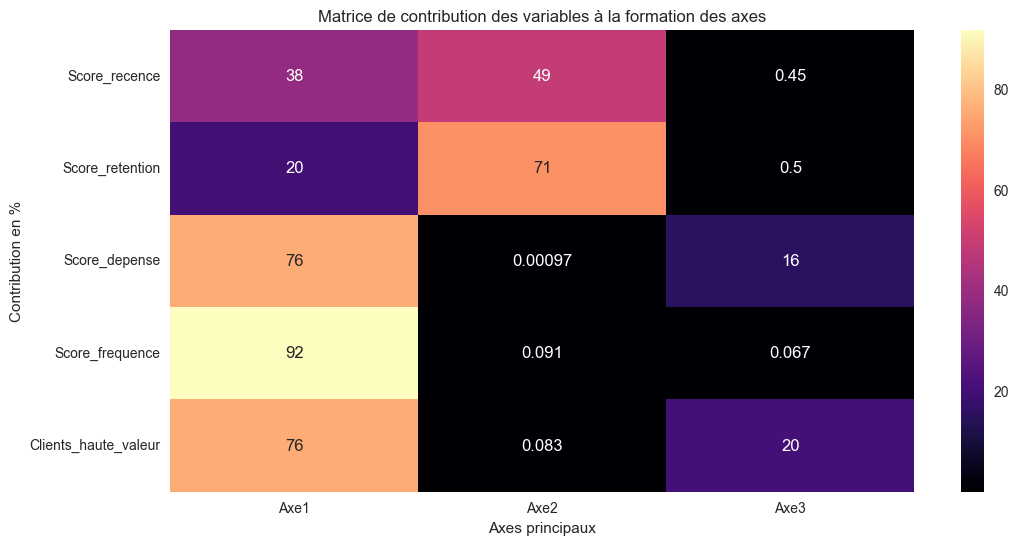

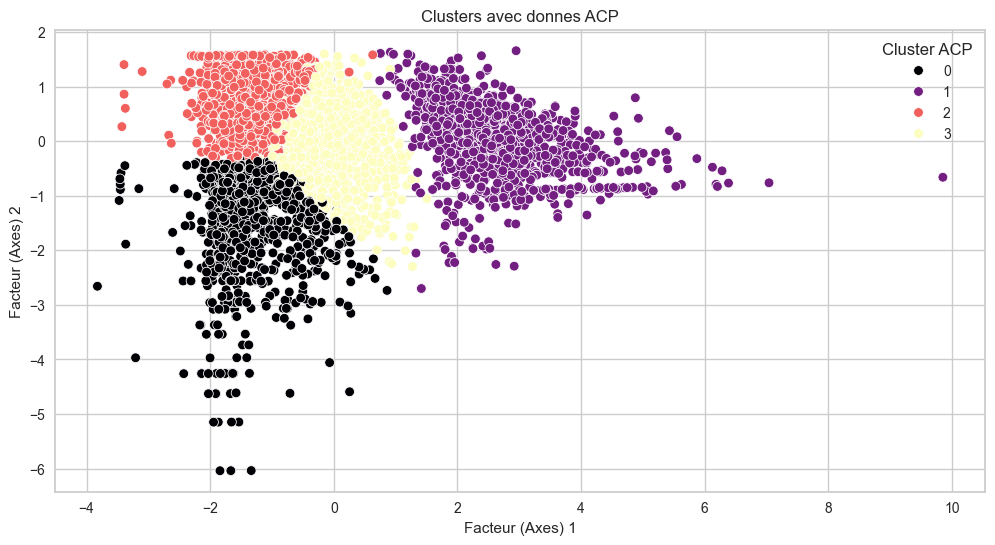

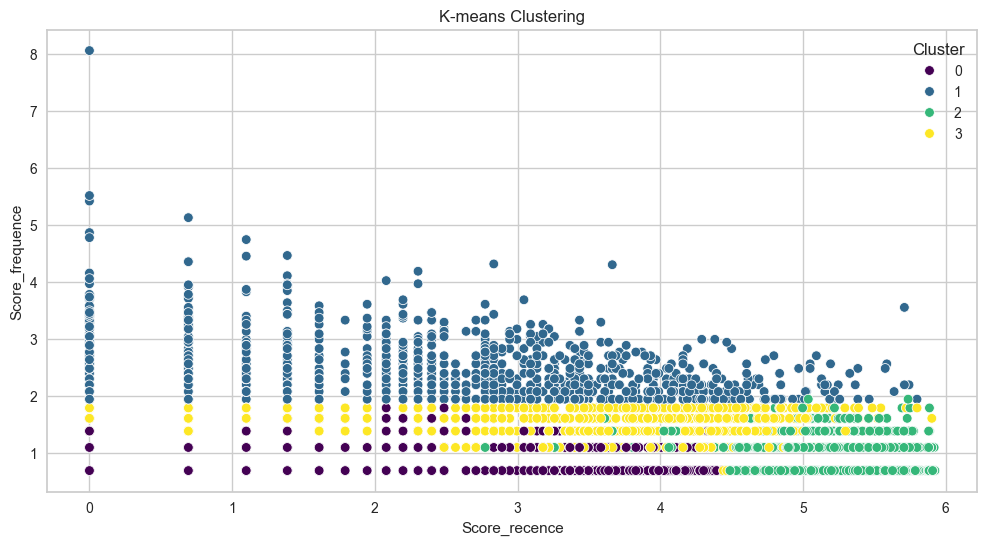

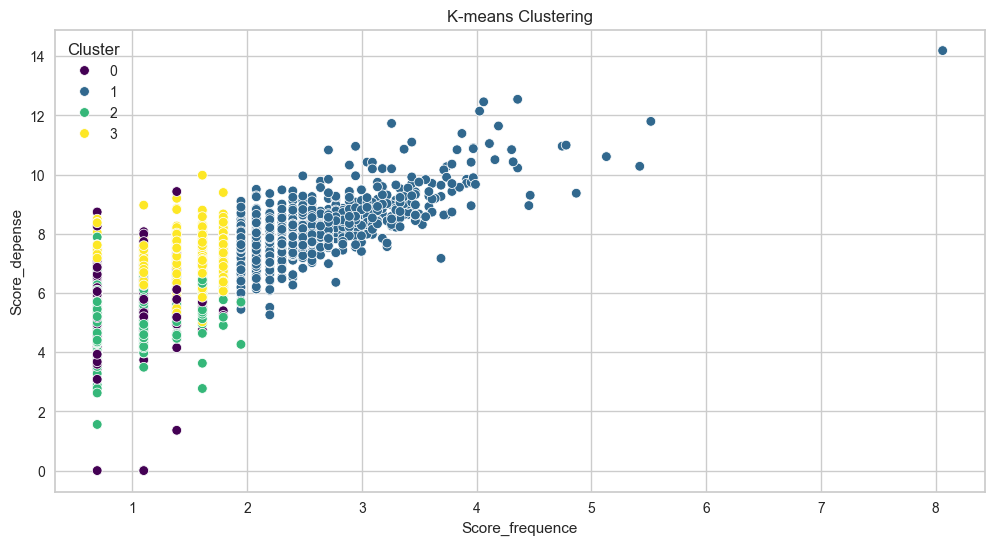

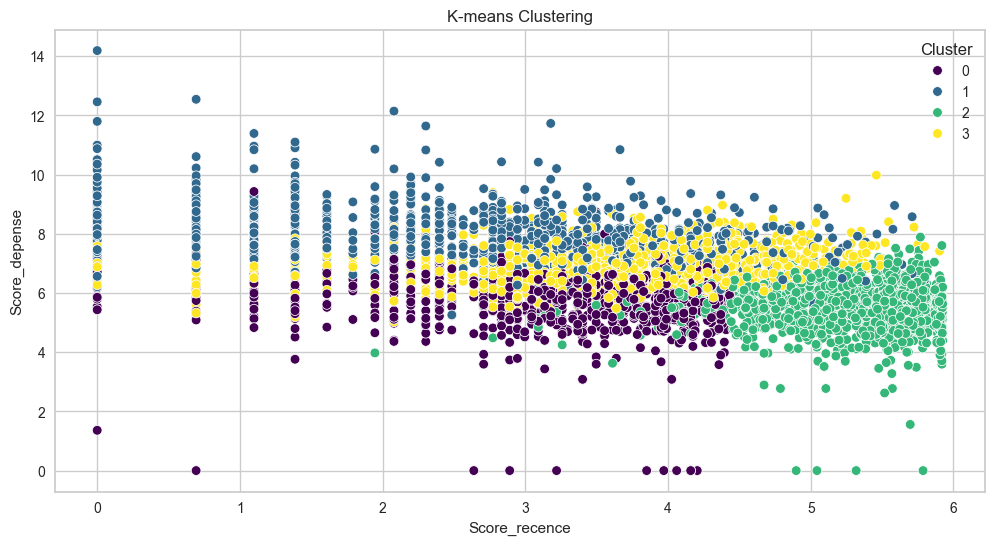

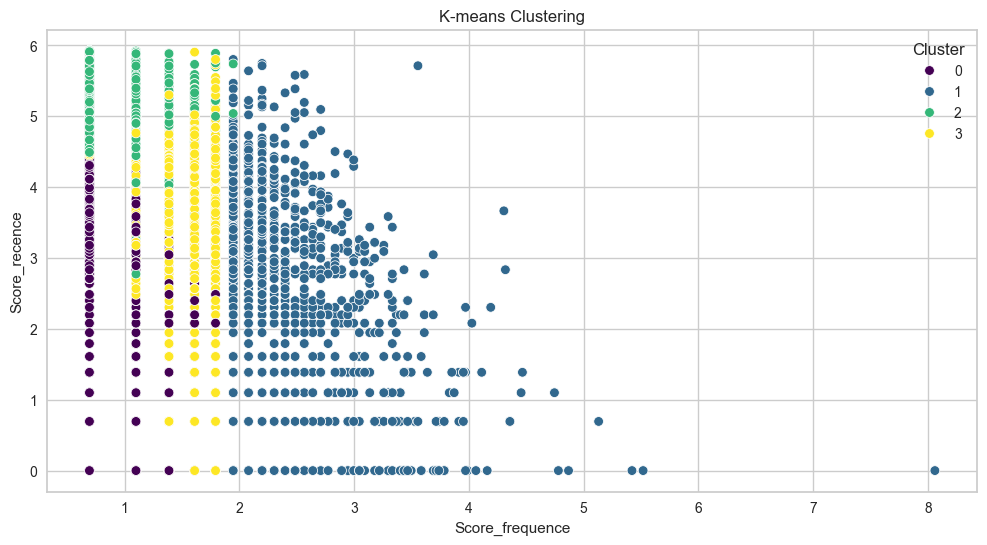

In [45]:
plt.figure(figsize=(12, 6))
sns.heatmap(tableau_contrib, annot= True, cmap = "magma")
plt.title("Matrice de contribution des variables à la formation des axes")
plt.ylabel("Contribution en %")
plt.xlabel("Axes principaux")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_facteurs[:, 0], y=df_facteurs[:, 1], hue= df_kmeans['Cluster'],  palette='magma')
plt.title('Clusters avec donnes ACP')
plt.xlabel('Facteur (Axes) 1')
plt.ylabel('Facteur (Axes) 2')
plt.legend(title='Cluster ACP')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=RFM, x='Score_recence', y='Score_frequence', hue=df_kmeans['Cluster'], palette='viridis')
plt.title('K-means Clustering')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=RFM, x='Score_frequence', y='Score_depense', hue=df_kmeans['Cluster'], palette='viridis')
plt.title('K-means Clustering')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=RFM, x='Score_recence', y='Score_depense', hue=df_kmeans['Cluster'], palette='viridis')
plt.title('K-means Clustering')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=RFM, x='Score_frequence', y='Score_recence', hue=df_kmeans['Cluster'], palette='viridis')
plt.title('K-means Clustering')
plt.show()

In [46]:
df_kmeans["CustomerID"] = RFM["CustomerID"]
RFM = RFM.merge(df_kmeans[["CustomerID","Cluster"]], on = "CustomerID", how = "left")

In [47]:
RFM.head(8)

,CustomerID,Recence,Score_recence,Retention,Score_retention,Frequence,Score_frequence,Depense,Score_depense,CLV,Score_RFM,Clients_haute_valeur,Cluster
0,12346,325,5.786897,325,5.786897,2,1.098612,0.00,0.000000,0.000000,0.00,False,2
1,12347,1,0.693147,366,5.905362,7,2.079442,4310.00,8.368925,4321.808219,30170.00,True,1
2,12348,74,4.317488,357,5.880533,4,1.609438,1797.24,7.494564,1757.848438,531983.04,False,3
3,12349,18,2.944439,18,2.944439,1,0.693147,1757.55,7.472245,86.673699,31635.90,False,0
4,12350,309,5.736572,309,5.736572,1,0.693147,334.40,5.815324,283.094795,103329.60,False,2
5,12352,35,3.583519,296,5.693732,11,2.484907,1545.41,7.343691,1253.264000,594982.85,True,1
6,12353,203,5.318120,203,5.318120,1,0.693147,89.00,4.499810,49.498630,18067.00,False,2
7,12354,231,5.446737,231,5.446737,1,0.693147,1079.40,6.985087,683.127123,249341.40,False,2


## Description  des clusters et Possible actions commerciales

- Cluster 0 : clients très ancien et qui ont achétés récement mais faible pouvoir d'achat faible fréquence et pourvoir d'achat 

- Cluster 1 : client VIP, anciens très fréquents et récens avec un haut pouvoir d'achat

- Cluster 2 : groupe de clients venant juste le groupe 1,  ils récent avec un pouvoir d'achat relativement solide c'est une sorte de classe moyenne Ils plus fréquents que le cluster 3 et moins que le premier, c'est les deuxièmes  après les VIP

- Cluster 3 : Clients très anciens (haute score de rentention) et très récents (ils ont achété récement) avec un pouvoir d'achat relativement mobasyen. Ils ont achété récement, ils ne sont pas fréquent avec un score de fréquence = 0.95 qui se situe entre le Q1 et Q2 : [0.69 , 1.38]

| Cluster                             | Description du segment                                                                                       | Actions marketing / commerciales                                                                                                  |
|-------------------------------------|--------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| Cluster 0 : Inactifs                | Clients qui n'ont pas acheté depuis longtemps ; faible fréquence et faible montant dépensé                   | Campagne de réactivation ; Relance personnalisée                                                                                  |
| Cluster 1 : Actifs de classe moyenne| Meilleurs clients : clients depuis longtemps ; dépensent beaucoup et achètent très fréquemment              | Programme premium ; invitations à des ventes privées  <br> Fidélisation renforcée <br> Service client dédié                      |
| Cluster 2 : VIP & Champions         | Achat régulier et montant moyen ; fréquence et récence correctes mais possibilité de montée en gamme         | Cross-selling / Up-selling ; Offre fidélité graduée ; suggestions de produits complémentaires ou premium                         |
| Cluster 3 : Anciens peu engagés     | Clients qui ont acheté très récemment ; faible fréquence et montant modeste ; reviennent après une longue pause | Programme de parrainage ; Incitation à la répétition ; Feedback récompensé (analyse de la satisfaction)                         |

In [52]:
display(centroids)

,Score_recence,Score_retention,Score_depense,Score_frequence,Clients_haute_valeur
Cluster,,,,,
0,3.165952,3.622351,5.687655,0.886911,0.000000
1,2.577652,5.695256,7.990827,2.485745,1.000000
2,5.257898,5.469920,5.562671,0.910740,0.001585
3,3.492908,5.400804,6.922922,1.471696,0.000000


## Partie 6 :  EXPORTATION DU MODELE ET PIPELINE

In [48]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [50]:
RFM = pd.read_csv(lien_RFM)
colonne = ["Score_recence","Score_retention","Score_depense","Score_frequence","Clients_haute_valeur"]
base_entrainement = RFM[colonne].copy()

# Création du tranformer qui prepare nos donnees et applique l'ACP
class AnalyseFactorielle(BaseEstimator, TransformerMixin) :
    def __init__(self, nombre_facteur):
        self.centre_reduis = StandardScaler()
        self.nombre_facteur = nombre_facteur
        self.pca = PCA(n_components=nombre_facteur)
        
    
    def fit(self, X, y= None):
        X_centre_reduis = self.centre_reduis.fit_transform(X)
        self.pca.fit(X_centre_reduis)
        return self
    
    def transform(self,X, y =None):
        X_centre_reduis = self.centre_reduis.transform(X)
        X_pca = self.pca.transform(X_centre_reduis)
        return X_pca
    

# Creation d'une pipeline
pipeline = Pipeline([
    ("Modele_acp",AnalyseFactorielle(nombre_facteur = 3)),
    ("Kmeans", KMeans(n_clusters= 3, random_state= 19))
])

# Entrainement de la pipeline
pipeline.fit(base_entrainement)

# Enregistrement de la pipeline
joblib.dump(pipeline, 'mon_pipeline_segmentation.joblib')

['mon_pipeline_segmentation.joblib']

In [51]:
# Test du pipeline et du modele

# Chargement
pipeline_charge = joblib.load('mon_pipeline_segmentation.joblib')

def traitement_et_prediction(nouvelle_base) :
    return pipeline_charge.predict(nouvelle_base)  

nouvelle_base = pd.DataFrame({
    "Score_recence": [8.5, 3, 9.2 ,5],
    "Score_retention": [5, 2.4, 2, 7],
    "Score_depense": [6, 3, 9, 7],
    "Score_frequence":[8, 5, 2, 3],
    "Clients_haute_valeur":[1, 0, 0, 0]})

base_exemple = nouvelle_base.copy()
base_exemple["Cluster"] = traitement_et_prediction(base_exemple)
display(base_exemple)

,Score_recence,Score_retention,Score_depense,Score_frequence,Clients_haute_valeur,Cluster
0,8.5,5.0,6,8,1,1
1,3.0,2.4,3,5,0,0
2,9.2,2.0,9,2,0,2
3,5.0,7.0,7,3,0,2


###                                                      FIN DU PROJET                                                             ###